# MPI 4 - Cours 2

## Un peu de calcul non commutatif : séries rationnelles et langages rationnels

Considérons l'alphabet $A=\{a,b\}$, et intéressons nous au langage $L=(a+ba)^*$.

L'ensemble $C=\{a,ba\}$ est ce qu'on appelle un *code préfixe*, c'est à dire que s'il contient un mot
$w$, il ne contient aucun préfixe $u$ de $w$ (un mot tel que $w=uv$ avec $u,v\not=\epsilon$).
C'est un *code*, car tout mot de $C^*$ n'a qu'une seule écriture comme concaténation d'éléments de $C$ (unicité du déchiffrage, ou encore, non-ambiguïté de la grammaire) :
$$w=baaabaaababaaa \rightarrow ba.a.a.ba.a.a.ba.ba.a.a$$
Le langage $L$  est reconnu par l'automate
![automate](automate.png)
Soit  $u_n$ le nombre de mots de longueur $n$ dans $L$. On a 
$$L = \{\epsilon, a, ba, aa, baa, aba, aaa, baba,baaa,abaa,aaba,aaaa,\cdots\}$$
et donc
$$u_0=1,\ u_1=1,\ u_2=2,\ u_3=3,\ u_4=5,\cdots$$
Si on note $L_n$ l'ensemble des mots de longueur $n$ dans $L$, on voit que pour $n\ge 2$,
$$L_n=aL_{n-1}+baL_{n-2}$$
puisqu'un mot de $L$ commence soit par $a$, soit par $ba$. Donc, $u_n=u_{n-1}+u_{n-2}$ avec $u_0=1$, $u_1=1$,
c'est donc la suite de Fibonacci décalée de 1.

Une technique classique pour étudier ce genre de problème est d'identifier les mots à des monômes en variables non commutatives, la concaténation devenant alors la multiplication et son élément neutre $\epsilon$ le scalaire 1.
Le code $C$ s'identifie alores au polynôme
$$C= a+ba$$
et le langage $L$ s'identifie à la série formelle
$$L = C^* =\sum_{n\ge 0}C^n = 1+C+C^2+\cdots = \frac1{1-C}=\frac1{1-a-ba}=1+a+ba+baa+aba+aaa+\cdots.$$
On trouve alors automatiquement la série génératrice de $u_n$ en remplaçant $a$ et $b$ par $x$ dans cette
expression, car les mots de longueur $n$ deviennent tous $x^n$
$$U(x)=\frac1{1-x-x^2}=1+x+2x^2+3x^3+5x^4+8x^3+\cdots$$
C'est donc la suite de Fibonacci décalée $u_n=F_{n+1}.$

D'une manière générale, l'expression $C^*$ se traduit par $(1-C)^{-1}$, mais on ne peut en déduire le dénombrement des mots par longueur que si l'expression est non ambiguë. Par exemple, $C=a+ab+ba$ n'est pas un code, puisque
$w=aba$ possède deux dérivations : $w=a.ba = ab.a$.
Dans la série non commutative
$$(1-a-ab-ba)^{-1}=1+a+ab+ba+ 2aba+aab+baa+aaa+\cdots$$
le coefficient d'un mot est le nombre de ses factorisations en éléments de $C$. On peut montrer en construisant l'automate minimal de $C^*$ qu'une expression non ambigue serait
$$((b+a(a+ba)^*bb)a)^*(\epsilon+a((a+ba)^*(\epsilon+b))$$
En remplaçant $a$ et $b$ par $x$ et les $X^*$ par des $(1-X)^{-1}$, on trouve pour la série génératrice
$$
\frac1{1-x-2\,{x}^{2}+{x}^{3}}=1+x+3\,{x}^{2}+4\,{x}^{3}+9\,{x}^{4}+14\,{x}^{5}+28\,{x}^{6}+47\,{x}^{7}+89\,{x}^{8}+155\,{x}^{9}+286\,{x}^{10}+507\,{x}^{11}+O \left( {x}^{12} \right)$$
Si on avait fait cela avec l'expression ambiguë, on aurait trouvé le résultat faux
$$\frac1{1-x-2x^2}=1+x+3\,{x}^{2}+5\,{x}^{3}+11\,{x}^{4}+21\,{x}^{5}+43\,{x}^{6}+85\,{x}^{7}+171\,{x}^{8}+341\,{x}^{9}+683\,{x}^{10}+1365\,{x}^{11}+O \left( {x}^{12} \right)$$

##  La décomposition en éléments simples

Lorsque la série génératrice d'une suite représente une fraction rationnelle, on peut la décomposer en éléments simples, pourvu que l'on connaisse les racines du dénominateur : si
$$U(x) = \frac{A(x)}{B(x)}$$
avec 
$$B(x)=(x-\beta_1)^{m_1}(x-\beta_2)^{m_2}\cdots(x-\beta_n)^{m_n}$$
alors, on peut trouver une décomposition de la forme
$$U(x)=P(x) +\sum_{k=1}^n\sum_{i_k=1}^{m_k}\frac{a_{ik}}{(x-\beta_k)^{i_k}}$$
où $P(x)$ est un polynôme (qui n'apparaît que si le degré de $A$ est supérieur ou égal à celui de $B$, auquel cas c'est le quotient de $A$ par $B$), et pour chaque racine $\beta$, on a un élément simple $\frac1{(x-\beta)^k}$ pour $k$ de 1 jusqu'à la multiplicité $m$ de $\beta$.

In [1]:
from sympy import *
init_printing()
var('x')

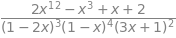

In [2]:
# Exemple au hasard
U = (2*x**12-x**3+x+2)/((1-2*x)**3*(1+3*x)**2*(1-x)**4);U

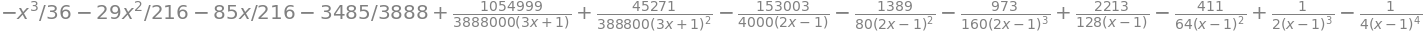

In [3]:
U.apart()

Notons que cette décomposition peut faire intervenir des racines complexes ou irrationnelles. Pour que `sympy` accepte de les calculer (s'il ne doit résoudre que des équations de degré au plus 4), il faut utiliser l'option `full=True` et la méthode `doit`.

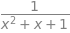

In [4]:
V = 1/(1+x+x**2);V

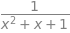

In [5]:
V.apart()

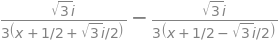

In [6]:
V.apart(full=True).doit()

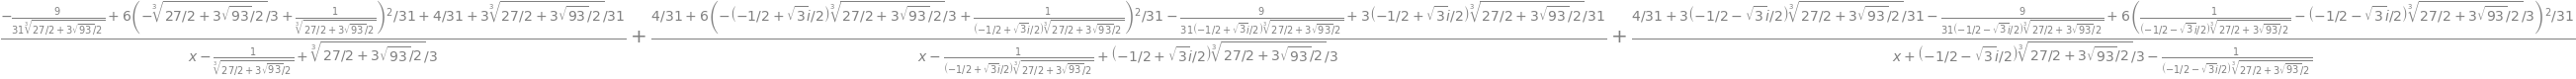

In [7]:
# Avec des équations du 3ème degré, le résultat n'est pas très exploitable ...
www=1/(1+x+x**3)
www.apart(full=True).doit()

## La formule du binôme généralisé

On voit qu'il faut être capable de développer en série entière les fractions simples 
$$\frac1{(1-x)^k}.$$
Pour $k=1$, c'est fait. On peut traiter $k=2$ en l'élevant au carré. En utilisant la formule générale de produit
$$\sum_{p\ge 0}a_px^p\sum_{q\ge 0}b_qx^q = \sum_{n\ge 0}\left(\sum_{p=0}^na_pb_{n-p}\right)x^n$$
on a
$$\left(\frac1{1-x}\right)^2 = \sum_{n\ge 0}\left(\sum_{p=0}^n 1\times 1\right)x^n=\sum_{n\ge 0}(n+1)x^n$$
Pour peu que l'on sache que 
$$1+2+\cdots +n = \frac{n(n+1)}{2}$$
on peut remultiplier par $\frac1{1-x}$ et obtenir
$$\left(\frac1{1-x}\right)^3 = \sum_{n\ge 0}\left(\sum_{p=0}^n (p+1)\times 1\right)x^n=\sum_{n\ge 0}\frac{(n+1)(n+2)}2x^n$$
Avec un effort supplémentaire, on peut encore trouver $k=4$ et deviner la formule générale
$$\left(\frac1{1-x}\right)^k = \sum_{n\ge 0}{n+k-1\choose n}x^n$$
et la prouver par récurrence.

Ou encore, la prouver combinatoirement : si on fait le produit de $k$ séries géométriques
$$\frac1{(1-x_1)(1-x_2)\cdots (1-x_k)}=\sum_{n_1\ge 0}x_1^{n_1}\sum_{n_2\ge 0}x_2^{n_2}\cdots\sum_{n_k\ge 0}x_k^{n_k},$$
on voit que le membre droit est la somme de tous les monômes en $x_1,\ldots,x_k$. Si l'on pose
$$x_1=x_2=\cdots=x_k=x$$
dans cette égalité, le membre gauche devient $\left(\frac1{1-x}\right)^k$, et le coefficient de $x^n$ dans le membre droit est le nombre de monômes de degré total $n$ que l'on peut former avec $k$ variables, c'est à dire, le nombre de sélections avec répétitions de $n$ objets parmi $k$, connu pour être égal à ${n+k-1\choose n}x^n$ d'après le cours de L2.


In [8]:
series(1/(1-x)**2,x,0,10)

In [9]:
series(1/(1-x)**3,x,0,10)

In [10]:
series(1/(1-x)**4,x,0,10)

On peut faire encore mieux. Rappelons qu'on définit $x^{p/q}$ comme $\sqrt[q]{x^p}$, et qu'on peut définir $x^\alpha$ pour $\alpha$ réel quelconque comme $\exp(\alpha\ln x)$.

On peut donc donner un sens à la série formelle $(1+x)^\alpha$ pour $\alpha$ quelconque. Posons
$$(1+x)^\alpha = \sum_{n\ge 0}a_nx^n$$
et cherchons les coefficients $a_n$.

On *définit* la dérivation des séries formelles en posant $(x^n)'=\frac{d}{dx}x^n=nx^{n-1}$ et en prolongeant par linéarité.
Il n'est pas difficile de monter que cette opération vérifie les propriétés usuelles de la dérivée des fonctions.
Par exemple, pour montrer $(fg)'=f'g+fg'$, on commence par le vérifier pour $f=x^p$ et $g=x^q$. Puis on utilise un première fois la linéarité pour en déduire que c'est encore vrai pour $f=x^p$ et $g$ quelconque, puis une seconde fois
pour $f$ et $g$ quelconques.

On en déduit ensuite par récurrence $(f^n)'=nf^{n-1}f'$, puis par linéarité, $g(f(x))'=g'(f(x))f'(x)$.

Comme $(1+x)^\alpha = \exp(\alpha\ln(1+x))$, on a
$$\frac{d}{dx}(1+x)^\alpha = \exp(\alpha\ln(1+x))\alpha\frac1{1+x}=\alpha(1+x)^{\alpha-1},$$
comme on pouvait s'y attendre.

On peut maintenant écrire
$$(1+x)\frac{d}{dx}(1+x)^\alpha = (1+x)\sum_{n\ge 0}n a_nx^{n-1}=\alpha (1+x)^\alpha=\sum_{n\ge 0}\alpha a_nx^n.$$
En effectuant le produit par $1+x$, on trouve
$$\sum_{n\ge 0}(n+1)a_{n+1}x^n+\sum_{n\ge 0}na_nx^n=\sum_{n\ge 0}\alpha a_nx^n$$
donc, en identifiant les coefficients de $x^n$
$$(n+1)a_{n+1}=(\alpha-n)a_n,\ \text{d'où}\ a_{n+1}=\frac{\alpha-n}{n+1} 
\frac{\alpha-n+1}{n} \frac{\alpha-n+2}{n-1}\cdots \frac{\alpha}{1}a_0.  $$
Comme on a clairement $a_0=1$, on a finalement
$$a_n = \frac{\alpha(\alpha-1)\cdots(\alpha-n+1)}{n!} =: {\alpha\choose n}.$$
Ces nombres sont appeliés coefficients binomiaux généralisés. Quand $\alpha$ est un entier positif, ils coincident
évidemment avec les coefficients binomiaux ordinaires.


### Exemple : $\alpha=\frac12$

On a
$\def\a{\frac12}$
$${1/2\choose n}=\frac{\a(\a-1)(\a-2)\cdots(\a-n+1)}{n!}
=\frac{1(1-2)(1-4)\cdots(1-2n+2)}{2^nn!}
=(-1)^{n-1}\frac{1\cdot 3\cdot 5\cdots (2n-3)}{2^nn!}$$
$$= (-1)^{n-1}\frac{(2n-2)!}{2^{n-1}(n-1)!2^nn!}= \frac{(-1)^{n-1}}{2^{2n-1}}\frac1{n}{2n-2\choose n-1}.$$

## Application : dénombrement des arbres binaires

Un *arbre binaire complet*, c'est soit un sommet unique `o`, soit
<pre>
    o
   / \
  A   B
</pre>

où `A` et `B` sont des arbres binaires complets. Soit $c_n$ le nombre d'arbre binaires complets à $n$ feuilles.
Les premiers exemples sont

<pre>
o         o                             o            o
         / \                           / \          / \
        o   o                         o   o        o   o
                                     / \              / \
                                    o   o            o   o
                                    

    _o__           __o___           __o__           __o___           _o__    
   /    \         /      \         /     \         /      \         /    \   
  o     _o_      o       _o_      o       o      _o_       o      _o_     o  
       /   \            /   \    / \     / \    /   \            /   \       
      o     o          o     o  o   o   o   o  o     o          o     o      
           / \        / \                           / \        / \           
          o   o      o   o                         o   o      o   o          
 


</pre>

On a donc $c_0=0$, $c_1=1$, $c_2=1$, $c_3=2$, $c_4=5$.

Comment calculer les $c_n$ ? 

Un arbre à $n$ feuilles aura un sous-arbre gauche $A$ à $p$ feuilles et un sous-arbre droit $B$ à $q$ feuilles,
avec $p+q=n$. Il y a $c_pc_q$ choix pour ces sous-arbres, et $p,q$ sont au moins égaux à 1 et au plus à $n-1$.
Donc, pour $n\ge 2$,
$$c_n = \sum_{p=1}^{n-1}c_pc_{n-p} =c_1c_{n-1}+c_2c_{n-2}+\cdots+c_{n-1}c_1.$$
C'est une récurrence qui fait intervenir *toutes* les valeurs précédentes. Testons là :
$$c_2 = c_1c_1 = 1,$$
$$c_3=c_1c_2+c_2c_1=1+1=2,$$
$$c_4=c_1c_3+c_2c_2+c_3c_1=2+1+2=5,$$
$$c_5=c_1c_4+c_2c_3+c_3c_2+c_4c_1=5+2+2+5=14,$$
$$c_6=c_1c_5+c_2c_4+c_3c_3+c_4c_2+c_5c_1=14+5+4+5+14=42, \ldots$$
Ces nombres sont très célèbres. On les appelle [nombres de Catalan](https://fr.wikipedia.org/wiki/Nombre_de_Catalan), bien qu'ils aient été découverts par Euler qui les appelait lui-même *nombres de Segner*.
Ce  [livre](https://books.google.fr/books/about/Catalan_Numbers.html?id=i5QSBwAAQBAJ&redir_esc=y) de Richard Stanley en recense 214 interprétations différentes.

Formons la série génératrice
$$C(x)=\sum_{n\ge 0}c_n x^n = 0 +x+x^2+2x^3+5x^4+14x^5+42x^6+\cdots$$
Puisque $c_0=0$, la récurrence s'écrit aussi bien
$$c_n = \sum_{p=0}^{n}c_pc_{n-p} \quad\text{pour $n\ge 2$} $$
Le membre droit est le coefficient de $x^n$ dans $C(x)^2$. Comme $C(x)$ commence par $x$, 
$C(x)^2$ commence par $x^2$, et on a donc en complétant 
$$C(x) = x + C(x)^2.$$
Autrement dit, $C(x)$ est solution de l'équation du second degré
$$X^2-X+x=0,$$
de discriminant $1-4x$, de sorte que
$$C(x)=\frac{1\pm\sqrt{1-4x}}{2}$$
On sait que $\sqrt{1-4x}=1-\frac12 x+O(x^2)$ par la formule du binôme généralisé, il faut donc choisir la solution avec le signe moins si l'on veut que son premier terme soit $x$
$$C(x)=\frac{1-\sqrt{1-4x}}{2}= \frac12\left[1-\sum_{n\ge 0}{1/2\choose n}(-4x)^n\right]
=\sum_{n\ge 1}\frac{(-1)^{n}}{2^{2n}}\frac1{n}{2n-2\choose n-1}(-4x)^n
=\sum_{n\ge 1}\frac1{n}{2n-2\choose n-1}x^n$$
ce qui nous donne finalement
$$c_n = \frac1{n}{2n-2\choose n-1}.$$
Vérifions :
$$c_6 = \frac16{10\choose 5}=\frac16 252 = 42.$$

In [11]:
[binomial(2*n-2,n-1)//n for n in range(1,12)]